In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class BanditArm:
    def __init__(self,m):
        self.m = m
        self.m_estimate = 0
        self.N = 0

    def pull(self):
        return np.random.random() + self.m 
    
    def update(self, x):
        self.N +=1 
        self.m_estimate = (1- 1.0/self.N)*self.m_estimate + 1.0/ self.N*x 
        

In [8]:
def run_experiment(m1, m2, m3, eps, N):
    bandits = [BanditArm(m1), BanditArm(m2), BanditArm(m3)]

    #count number of suboptimal choices
    means = np.array([m1, m2, m3])
    true_best = np.argmax(means) 
    count_suboptimal = 0

    data = np.empty(N)

    for i in range(N):
        #epsilon greedy
        p = np.random.random()
        if p<eps:
            j = np.random.choice(len(bandits))
        else:
            j = np.argmax([b.m_estimate for b in bandits])
        x= bandits[j].pull()
        bandits[j].update(x)

        if j != true_best:
            count_suboptimal+=1

        data[i] = x
        #for the plot

    cumulative_average = np.cumsum(data) / (np.arange(N)+1)

    plt.plot(cumulative_average)
    plt.plot(np.ones(N)*m1)
    plt.plot(np.ones(N)*m2)
    plt.plot(np.ones(N)*m3)
    plt.xscale('log')
    plt.show()

    for b in bandits:
        print(b.m_estimate)

    print(f"percent suboptimal for epsilon = {eps}:", float(count_suboptimal)/N)
    return cumulative_average







In [9]:
m1, m2, m3 = 1.5, 2.5, 3.5

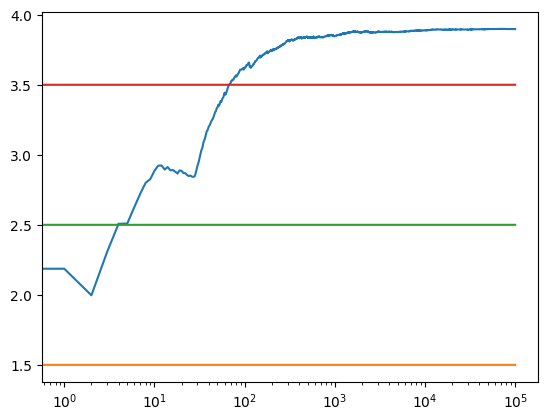

1.998570845097174
2.9916422017674096
3.9991068623269395
percent suboptimal for epsilon = 0.1: 0.06744


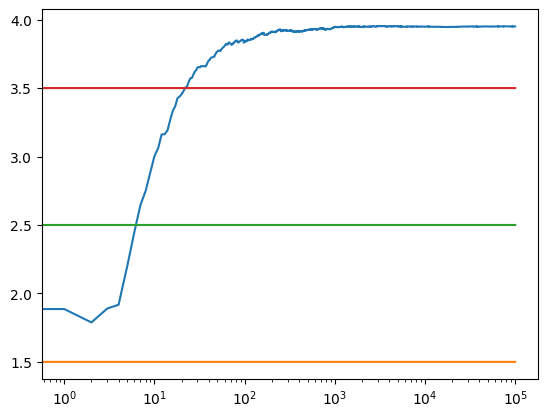

1.9924232934046973
3.002312778196889
3.999654760099618
percent suboptimal for epsilon = 0.05: 0.03303


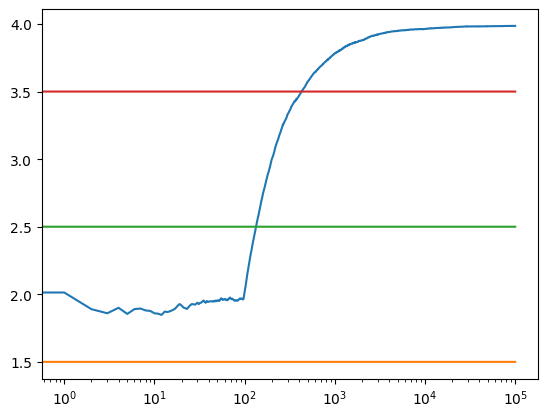

1.9875336533778778
3.0252669663646357
3.99842062313444
percent suboptimal for epsilon = 0.01: 0.00804


In [10]:
c_1 = run_experiment(m1, m2, m3, 0.1, 100000)
c_05 = run_experiment(m1,m2,m3, 0.05, 100000)
c_01 = run_experiment(m1,m2,m3,0.01, 100000)

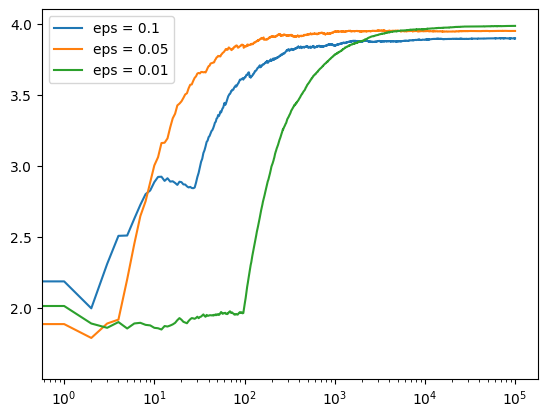

In [11]:
# log scale plot 
plt.plot(c_1, label='eps = 0.1')
plt.plot(c_05, label='eps = 0.05')
plt.plot(c_01, label= 'eps = 0.01')
plt.legend()
plt.xscale('log')
plt.show()

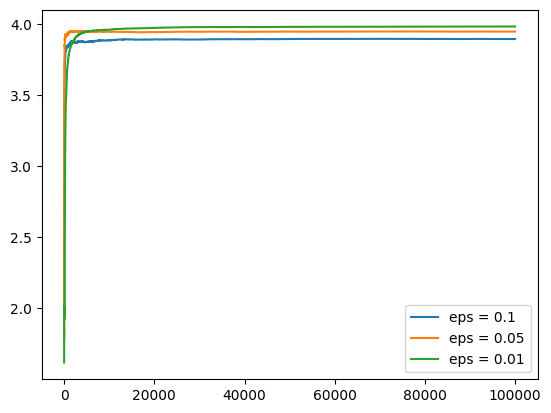

In [12]:
#linear plot
plt.plot(c_1, label='eps = 0.1')
plt.plot(c_05, label='eps = 0.05')
plt.plot(c_01, label= 'eps = 0.01')
plt.legend()
#
plt.show()